In [114]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [115]:
df = pd.read_csv('../country_data_clustering/Country-data.csv')

In [116]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [117]:
#check for null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [119]:
def get_vizualization(df:pd.DataFrame)->pd.DataFrame:
    """_summary_

    Args:
        df (pd.DataFrame): _description_

    Returns:
        pd.DataFrame: _description_
    """
    df2 = pd.DataFrame()
    for x in list(df.columns):
        small = df[x].min()
        big = df[x].max()
        diff = df[x].max() - df[x].min()
        bins = [small-1,small+.1*diff,small+.2*diff,small+.3*diff,small+.4*diff,small+.5*diff,small+.6*diff,small+.7*diff,small+.8*diff,small+.9*diff,big]
        # bins = [0,0.1*df[x].max(),0.2*df[x].max(),0.3*df[x].max(),0.4*df[x].max(),0.5*df[x].max(),0.6*df[x].max(),0.7*df[x].max(),0.8*df[x].max(),0.9*df[x].max(),df[x].max()]
        df2[x] = pd.cut(df[x],bins=bins, labels = [1,2,3,4,5,6,7,8,9,10])
    for x in list(df2.columns):
        fig = px.histogram(df2, x=x)
        fig.show()
    return df2


In [120]:
fig = px.histogram(df, x='country')
fig.show()

In [121]:
#looking at the distribution of the data
df_test = get_vizualization(df.drop('country',axis=1))
# df_test.isna().sum()

In [122]:
data = df.drop('country',axis=1).copy()

In [123]:
scaler =StandardScaler()
data = scaler.fit_transform(data)

In [124]:
pca = PCA(n_components=4)
res_data = pca.fit_transform(data)


In [125]:
#feature importance
features = range(pca.n_components)
fig = px.bar(x=features,y=pca.explained_variance_ratio_)
fig.show()
print(f'Total explained variance: {pca.explained_variance_ratio_.sum()}')

Total explained variance: 0.8719078614023911


In [126]:
# import matplotlib.pyplot as plt
# # scree plot
# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color="blue")
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)

# # df1_pca = pd.DataFrame(res_data)

Elbow Score Plot (distortion metric):
elbow value = optimal k: 4  | elbow score: 514.207


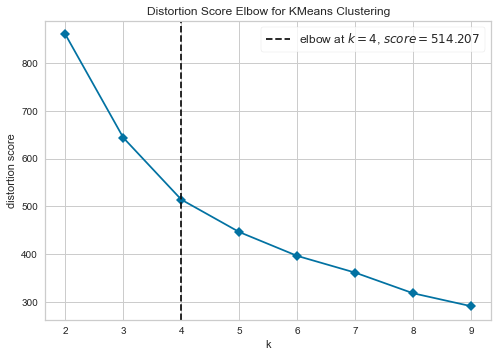

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 4  | elbow score: 0.349


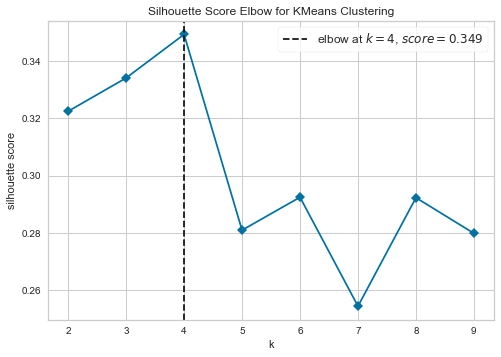

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 2  | elbow score: 86.694


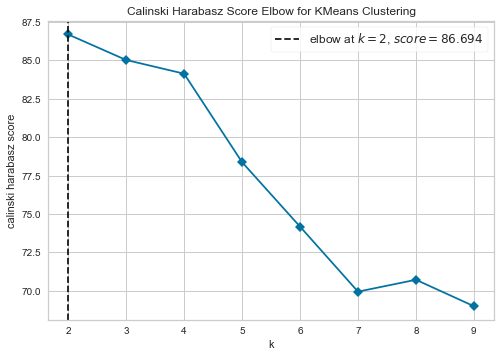

100%|██████████| 3/3 [00:01<00:00,  2.94it/s]


In [127]:
# elbow score plot with Yellowbrick
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,10), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

model = KMeans(random_state=42)
_ = [elbowplot(res_data, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]    

In [128]:
model = KMeans(n_clusters=4, random_state=42, verbose=0)
clusters_assigned = model.fit_predict(res_data)

In [129]:
clusters_assigned.dtype

dtype('int32')

In [130]:
df['cluster'] = clusters_assigned
#df['cluster2'] = pd.Series(clusters_assigned,index=df.index)
#df.insert(0, "cluster", clusters_assigned) 

In [131]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1
